**package dependencies**
- pandas=1.4.3
- sklearn=1.1.1
- matplotlib=3.5.2
- jupyterlab=3.4.3
- python=3.9.13

In [1]:
print('hello')

hello


In [2]:
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [4]:
df.rename(columns={'Spending Score (1-100)':'Spending','Annual Income (k$)':'Annual Income'},inplace=True)
df.head()

,CustomerID,Gender,Age,Annual Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
rel_cols = ['Age','Annual Income','Spending']
df_rel = df[rel_cols]

In [6]:
df_rel

,Age,Annual Income,Spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


### Standardize the numeric values

In [7]:
from sklearn.preprocessing import StandardScaler
X = df_rel.values

In [8]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [9]:
x_scaled

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

# Let's try what we learned today

In [11]:
from sklearn.cluster import KMeans
model1 = KMeans(n_clusters=5)

In [13]:
model1 = model1.fit(x_scaled)

/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
model1.labels_

array([3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3,
       2, 3, 4, 3, 3, 3, 4, 3, 3, 4, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 3,
       4, 4, 3, 3, 4, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 3, 4, 4, 3, 4, 4, 3,
       3, 4, 4, 3, 4, 4, 3, 3, 4, 3, 4, 3, 3, 4, 4, 3, 4, 3, 4, 4, 4, 4,
       4, 3, 1, 3, 3, 3, 4, 4, 4, 4, 3, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 4, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

In [16]:
model1.inertia_

168.2475801755684

In [25]:
model_temp = KMeans(n_clusters=10)
model_temp = model_temp.fit(x_scaled)
model_temp.inertia_

/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


81.96348333376197

In [30]:
from sklearn.cluster import KMeans
WSS = []
for i in range(1,25):
    m = KMeans(n_clusters=i)
    m = m.fit(x_scaled)
    WSS.append(m.inertia_)

/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/infinity/a

In [31]:
WSS

[600.0000000000001,
 389.3861889564371,
 295.9682956968385,
 205.22514747675916,
 168.24758017556837,
 133.86833362685584,
 117.20068531262645,
 103.87600799022277,
 92.95472734061505,
 82.56416884439223,
 72.66456408537346,
 69.21589706717864,
 63.63332511879386,
 60.11386365486981,
 56.75791592375975,
 53.96025724834631,
 51.14170039536996,
 49.27725990060588,
 47.88228455933616,
 45.76872458337074,
 43.38727397767575,
 41.682203341320175,
 39.74123012054502,
 37.62894604916652]

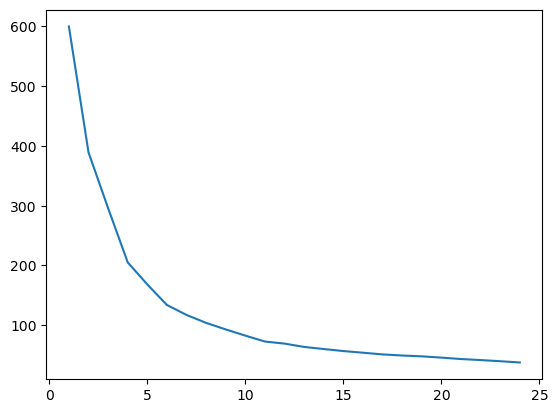

In [33]:
import matplotlib.pyplot as plt
x = list(range(1,25))
plt.plot(x,WSS,"-")

**Class Exercise**

Use the dataset `customers.csv` and do the following

1. Find WSS when number of clusters are 3 and 7
2. Also make an elbow curve and suggest how many cluster models you will experiment with

In [55]:
customers = pd.read_csv('customers.csv')
customers.head(2)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6


In [65]:
customers.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

### Approach 1

In [54]:
customers = customers.dropna()

### Approach 2

In [58]:
rel_cols = ['Age','Work_Experience','Family_Size']
X = customers[rel_cols].dropna().values

In [59]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [63]:
WSS = []
for i in range(1,12):
    m = KMeans(n_clusters=i)
    m = m.fit(x_scaled)
    WSS.append(m.inertia_)

/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/infinity/a

In [64]:
WSS

[6800.999999999999,
 4832.188382100587,
 3188.140004056224,
 2381.812610540699,
 2069.430664266814,
 1781.7457409057793,
 1519.0389899350782,
 1407.3578432663767,
 1301.694168290673,
 1217.6238743325089,
 1136.017138113924]

In [66]:
WSS[2]

3188.140004056224

In [67]:
WSS[6]

1519.0389899350782

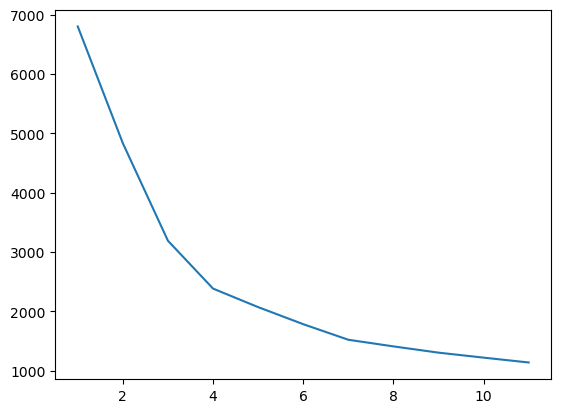

In [68]:
x = list(range(1,12))
plt.plot(x,WSS,"-")